In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt   
import matplotlib.axes as ax
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

**<h4>1. COMPARE PARAMETER VALUES</h4>**

**Choose desired parameter values and variables to plot below.**

In [39]:
# Parameter values
values = [0.08,10.0]

# Variables to plot PLEASE CHOOSE 12 VARIABLES
varl = ['P_C','P_Y','P_Y_KL','Y','C','C_Y','K','ell','E','r_K','r_ell','w',]

**Choose desired parameter, specify a chock, and run the model (might take some time).**

In [40]:
s1={} # dict for sol
s2={} # dict for ss

for i,value in enumerate(values):
    
    from BabyMAKROModel import BabyMAKROModelClass
    
    model = BabyMAKROModelClass(name='baseline')
    
    par = model.par
    ss = model.ss
    sol = model.sol
    
    # choose parameter
    par.sigma = value
    
    # run model in SS
    model.find_ss(0.50)
    model.set_exo_ss()
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors(do_print=True)
    
    # apply shock
    model.calc_jac()
    model.set_exo_ss()
    Tshock = 20
    shock1 = 0.01*ss.r_E
    shock2 = 0.01*ss.P_E
    persistence = 0.75**np.arange(Tshock)
    sol.r_E[:Tshock] = ss.r_E + shock1*persistence
    sol.P_E[:Tshock] = ss.P_E + shock2*persistence

    # run model with shock
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors()
    model.find_IRF()

    # save variables in dictonaries
    for var in varl:
        key = str(var+str(i)) 
        s1[key] = sol.__dict__[var]
        s2[key] = ss.__dict__[var]

bargaining_cond     : abs. max = 2.22e-16
Bq_match            : abs. max = 1.74e-12
FOC_capital_agency  : abs. max = 2.22e-16
FOC_K_ell           : abs. max = 2.22e-16
FOC_E_Y_KL          : abs. max = 5.55e-17
mkt_clearing        : abs. max = 2.84e-14
output_price        : abs. max = 0.00e+00
initial:
   max. abs. error = 3.06e+00
    2.22e-16 in bargaining_cond
    3.06e+00 in Bq_match
    2.22e-16 in FOC_capital_agency
    2.22e-16 in FOC_K_ell
    4.11e-03 in FOC_E_Y_KL
    1.66e-01 in mkt_clearing
    3.69e-03 in output_price

it = 0
 solve: t1-t0 = 2.5 secs
   max. abs. error = 3.06e+00
    2.90e-05 in bargaining_cond
    4.32e-02 in Bq_match
    2.44e-06 in FOC_capital_agency
    1.77e-05 in FOC_K_ell
    2.14e-05 in FOC_E_Y_KL
    3.10e-03 in mkt_clearing
    8.01e-06 in output_price
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.1 secs

it = 1
 solve: t1-t0 = 2.2 secs
   max. abs. error = 4.32e-02
    7.80e-07 in bargaining_cond
    8.03e-04 in Bq_match
    6.55e-08 in FOC_

**Plot the variables and see the effects of different parameter values.**

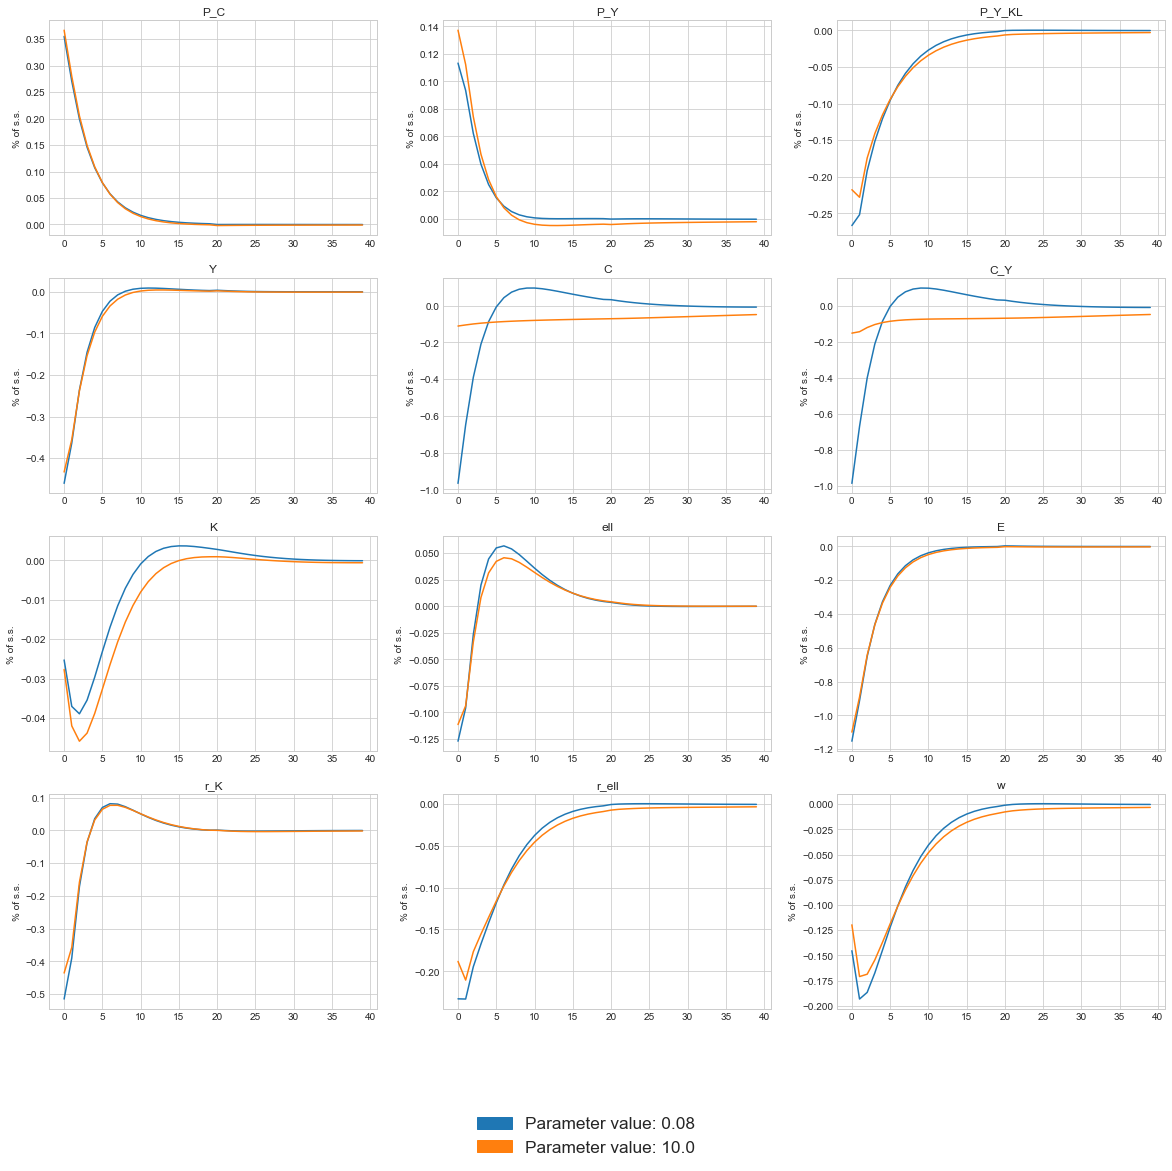

In [41]:
T_IRF = 40

fig = plt.figure(figsize=(20,20/1.1))

first_leg = mpatches.Patch(color='#1f77b4', label='Parameter value: '+str(values[0]))
second_leg = mpatches.Patch(color='#ff7f0e', label='Parameter value: '+str(values[1]))
#third_leg = mpatches.Patch(color='#2ca02c', label='Parameter value: '+str(values[2]))

fig.legend(handles=[first_leg,second_leg], loc='lower center', fontsize='xx-large')

for i,var in enumerate(varl):
    
    ax = fig.add_subplot(4,3,i+1)
    
    ax.set_ylabel('% of s.s.')
    ax.set_title(var)
     
    for j,value in enumerate(values):
        ax.plot((s1[str(var+str(j))][:T_IRF]/s2[str(var+str(j))]-1)*100)
        
plt.savefig('1_sigma_C.png')


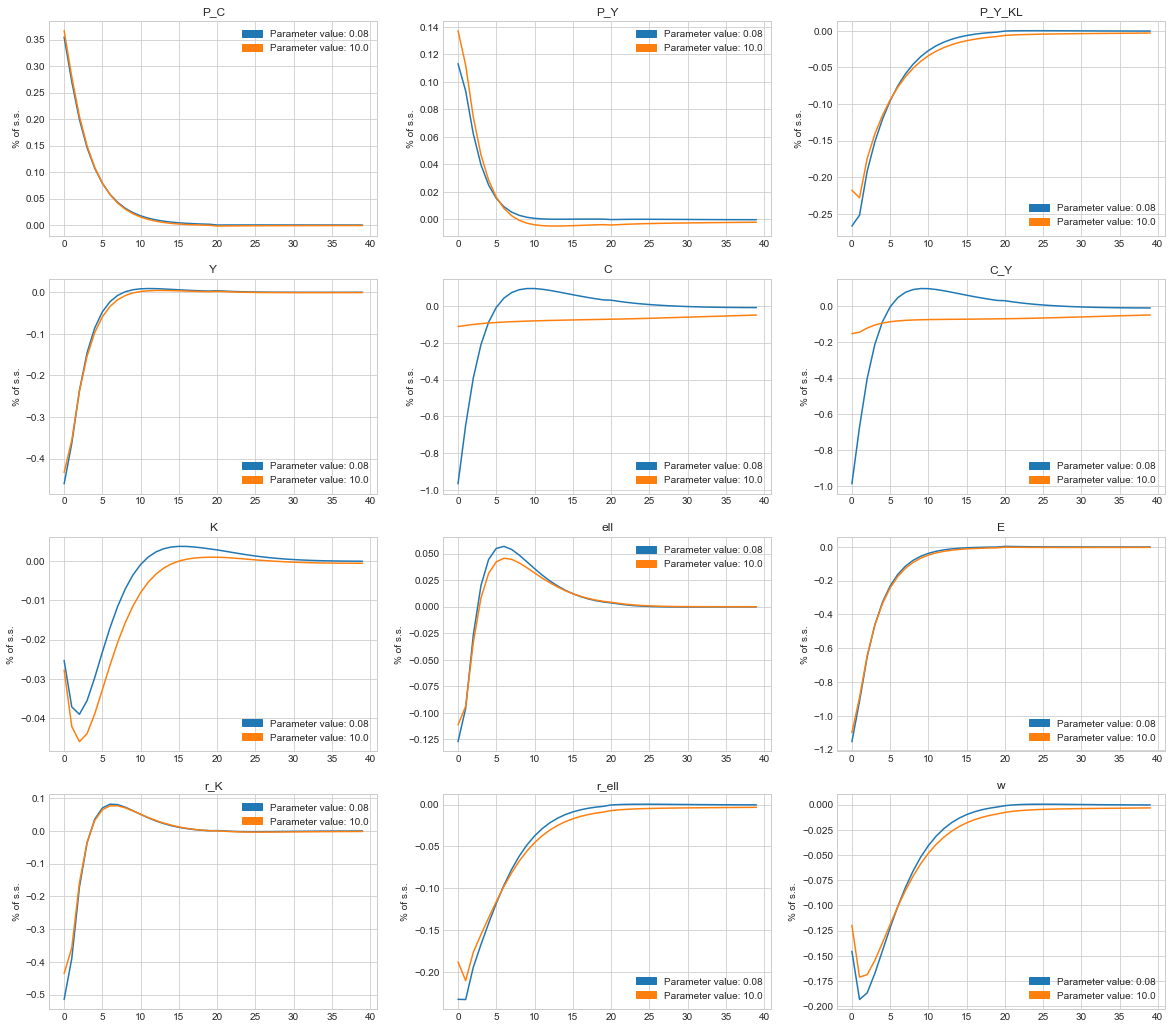

In [42]:
T_IRF = 40

fig = plt.figure(figsize=(20,20/1.1))

first_leg = mpatches.Patch(color='#1f77b4', label='Parameter value: '+str(values[0]))
second_leg = mpatches.Patch(color='#ff7f0e', label='Parameter value: '+str(values[1]))
#third_leg = mpatches.Patch(color='#2ca02c', label='Parameter value: '+str(values[2]))

for i,var in enumerate(varl):
    
    ax = fig.add_subplot(4,3,i+1)
    
    ax.set_ylabel('% of s.s.')
    ax.set_title(var)
     
    for j,value in enumerate(values):
        ax.plot((s1[str(var+str(j))][:T_IRF]/s2[str(var+str(j))]-1)*100)
    ax.legend(handles=[first_leg,second_leg])

plt.savefig('2_sigma_C.png')

In [2]:
# Parameter values
values1 = [1,0]
values2 = [0.5,0.001]

# Variables to plot PLEASE CHOOSE 12 VARIABLES
varl = ['P_C','P_Y','P_Y_KL','Y','C','I','K','ell','E','r_K','r_ell','w',]

In [3]:
s1={} # dict for sol
s2={} # dict for ss

for i,(val1, val2) in enumerate(zip(values1, values2)):
    
    from BabyMAKROModel import BabyMAKROModelClass
    
    model = BabyMAKROModelClass(name='baseline')
    
    par = model.par
    ss = model.ss
    sol = model.sol
    
    # choose parameter
    par.iota_0 = val1
    par.gamma_w = val2
    
    # run model in SS
    model.find_ss(0.50)
    model.set_exo_ss()
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors(do_print=True)
    
    # apply shock
    model.calc_jac()
    model.set_exo_ss()
    Tshock = 20
    shock = 0.01*ss.P_M_C
    persistence = 0.75**np.arange(Tshock)
    sol.P_M_C[:Tshock] = ss.P_M_C + shock*persistence
    sol.P_M_G[:Tshock] = ss.P_M_G + shock*persistence
    sol.P_M_I[:Tshock] = ss.P_M_I + shock*persistence
    sol.P_M_X[:Tshock] = ss.P_M_X + shock*persistence
    sol.P_F[:Tshock] = ss.P_F + shock*persistence

    # run model with shock
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors()
    model.find_IRF()

    # save variables in dictonaries
    for var in varl:
        key = str(var+str(i)) 
        s1[key] = sol.__dict__[var]
        s2[key] = ss.__dict__[var]

bargaining_cond     : abs. max = 2.22e-16
Bq_match            : abs. max = 3.83e-12
FOC_capital_agency  : abs. max = 2.22e-16
FOC_K_ell           : abs. max = 2.22e-16
FOC_E_Y_KL          : abs. max = 5.55e-17
mkt_clearing        : abs. max = 0.00e+00
output_price        : abs. max = 0.00e+00
initial:
   max. abs. error = 4.97e+00
    2.22e-16 in bargaining_cond
    6.01e-02 in Bq_match
    1.16e-03 in FOC_capital_agency
    2.22e-16 in FOC_K_ell
    5.55e-17 in FOC_E_Y_KL
    4.97e+00 in mkt_clearing
    0.00e+00 in output_price

it = 0
 solve: t1-t0 = 1.1 secs
   max. abs. error = 4.97e+00
    6.58e-04 in bargaining_cond
    9.06e-03 in Bq_match
    5.97e-05 in FOC_capital_agency
    3.86e-04 in FOC_K_ell
    1.94e-04 in FOC_E_Y_KL
    7.29e-02 in mkt_clearing
    3.51e-04 in output_price
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.1 secs

it = 1
 solve: t1-t0 = 1.0 secs
   max. abs. error = 7.29e-02
    1.11e-04 in bargaining_cond
    9.83e-04 in Bq_match
    3.43e-06 in FOC_

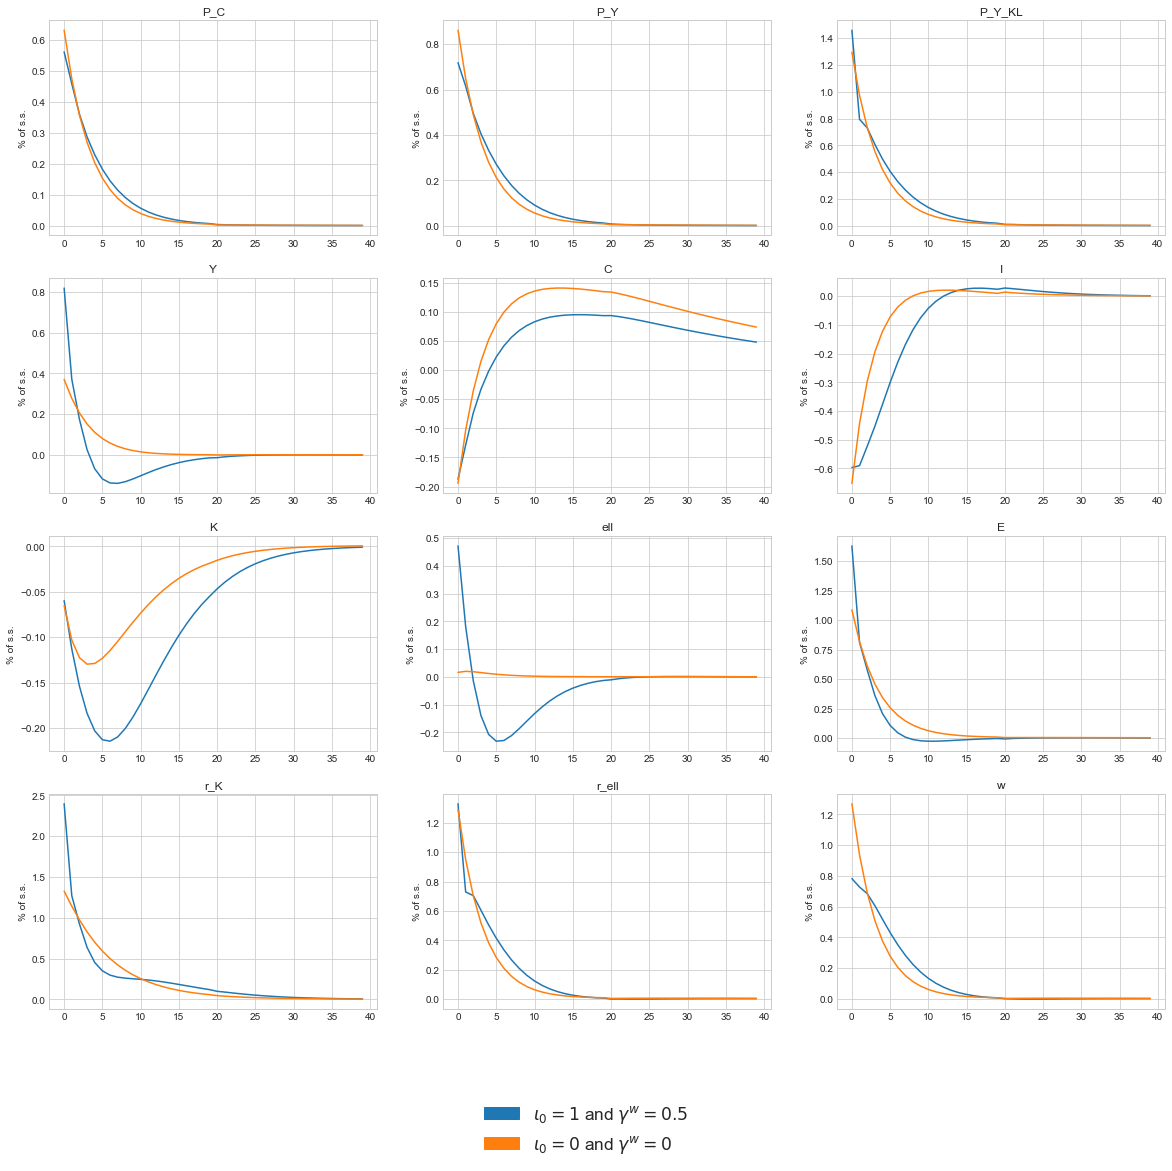

In [11]:
T_IRF = 40

fig = plt.figure(figsize=(20,20/1.1))

first_leg = mpatches.Patch(color='#1f77b4', label='$\iota_0 = 1$ and $\gamma^w = 0.5$')
second_leg = mpatches.Patch(color='#ff7f0e', label='$\iota_0 = 0$ and $\gamma^w = 0$')
#third_leg = mpatches.Patch(color='#2ca02c', label='Parameter value: '+str(values[2]))

fig.legend(handles=[first_leg,second_leg], loc='lower center', fontsize='xx-large')

for i,var in enumerate(varl):
    
    ax = fig.add_subplot(4,3,i+1)
    
    ax.set_ylabel('% of s.s.')
    ax.set_title(var)
     
    for j,val in enumerate(values1):
        ax.plot((s1[str(var+str(j))][:T_IRF]/s2[str(var+str(j))]-1)*100)
        
plt.savefig('1_sigma_C.png')

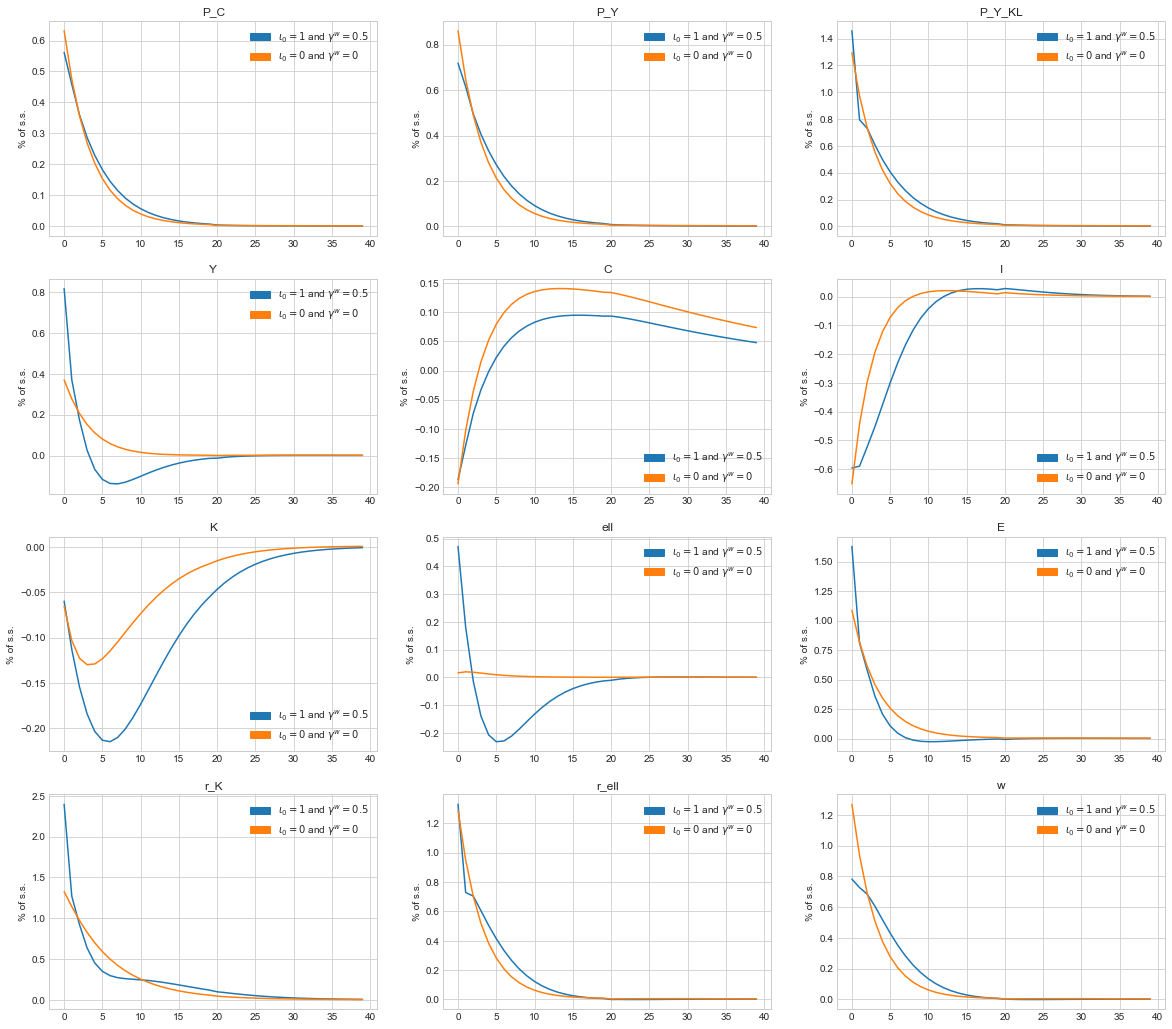

In [12]:
T_IRF = 40

fig = plt.figure(figsize=(20,20/1.1))

first_leg = mpatches.Patch(color='#1f77b4', label='$\iota_0 = 1$ and $\gamma^w = 0.5$')
second_leg = mpatches.Patch(color='#ff7f0e', label='$\iota_0 = 0$ and $\gamma^w = 0$')
#third_leg = mpatches.Patch(color='#2ca02c', label='Parameter value: '+str(values[2]))

for i,var in enumerate(varl):
    
    ax = fig.add_subplot(4,3,i+1)
    
    ax.set_ylabel('% of s.s.')
    ax.set_title(var)
     
    for j,val in enumerate(values1):
        ax.plot((s1[str(var+str(j))][:T_IRF]/s2[str(var+str(j))]-1)*100)
    ax.legend(handles=[first_leg,second_leg])

plt.savefig('2_sigma_C.png')

**<h4>2. COMPARE SHOCKS</h4>**

**Specify shocks and choose variables to plot below.**

In [ ]:
# specify shocks
var_l = ['P_E','r_E'] # variables to shock
Tshock_l = [20,20, 20] # length of shock (periods)
shock_l = [0.01,0.01, 0.01] # shock as pct. of ss
pers_l = [0.75,0.75,0.75] # persistence of shock

# Variables to plot PLEASE CHOOSE 12 VARIABLES
varl = ['P_C','P_Y','P_Y_KL','Y','C','C_Y','K','ell','E','r_K','r_ell','r_E']

**Run model for each shock.**

In [ ]:
s1={} # dict for sol
s2={} # dict for ss

for i,(var, Tshock, shock, pers) in enumerate(zip(var_l, Tshock_l, shock_l, pers_l)):
    
    from BabyMAKROModel import BabyMAKROModelClass
    
    model = BabyMAKROModelClass(name='baseline')
    
    par = model.par
    ss = model.ss
    sol = model.sol
    
    # run model in SS
    model.find_ss(0.50)
    model.set_exo_ss()
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors(do_print=True)
    
    # apply shock
    model.calc_jac()
    model.set_exo_ss()
    shock = shock*ss.__dict__[var]
    pers = pers**np.arange(Tshock)
    sol.__dict__[var][:Tshock] = ss.__dict__[var] + shock*pers

    # run model with shock
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors()
    model.find_IRF()

    # save variables in dictonaries
    for var in varl:
        key = str(var+str(i)) 
        s1[key] = sol.__dict__[var]
        s2[key] = ss.__dict__[var]

**Plot the variables and compare the shocks.**

In [ ]:
import matplotlib.patches as mpatches

T_IRF = 40

fig = plt.figure(figsize=(20,20/1.1))
first_leg = mpatches.Patch(color='#1f77b4', label='1 pct. shock to: '+str(var_l[0]))
second_leg = mpatches.Patch(color='#ff7f0e', label='1 pct. shock to: '+str(var_l[1]))
third_leg = mpatches.Patch(color='#2ca02c', label='1 pct. shock to: '+str(var_l[2]))
ax.legend(handles=[first_leg ,second_leg,third_leg])

for i,var in enumerate(varl):
    
    ax = fig.add_subplot(4,3,i+1)
    
    ax.set_ylabel('% of s.s.')
    ax.set_title(var)
     
    for j,value in enumerate(var_l):
        ax.plot((s1[str(var+str(j))][:T_IRF]/s2[str(var+str(j))]-1)*100)


In [ ]:
sol.C/sol.Y

In [ ]:
sol.Y/sol.C_Y